In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = '/home/ansgar/Master_Thesis/fabian/tomo_gray_SUB_005_000_mink_val/'
xyz_path = '/home/ansgar/Master_Thesis/data_eval/preprocessed/VF_005/tomo_gray_SUB_005_000.txt'
save_path = '/home/ansgar/Master_Thesis/fabian/'

$\Large{\text{Minkowski Functionals}}$

In [2]:
def read_mf(df, path):
    data = pd.read_table(path + 'w000_w100_w200_w300', delimiter = '\s+', comment = '#', engine = 'python', index_col = 0,
                 names = ['value', 'type', 'closed', 'reference'])

    for tp in ['w000', 'w100', 'w200', 'w300']:
        #tp stands for type
        df[tp] = data.loc[data.type == tp, 'value']

$\Large{\text{Minkowski Vectors}}$

In [3]:
def read_mv(df, path):
    data = pd.read_table(path + 'w010_w110_w210_w310', delimiter = '\s+', comment = '#', engine = 'python', index_col = 0,
                 names = ['value_x', 'value_y', 'value_z', 'type', 'closed', 'reference'])

    for tp in ['w010', 'w110', 'w210', 'w310']:
        df[[tp+'_x', tp+'_y', tp+'_z']] = data.loc[data.type == tp, ['value_x', 'value_y', 'value_z']]

$\Large{\text{Minkowski Tensors}}$

In [4]:
def read_mt(df, path):
    for tensor in ['w020_eigsys', 'w120_eigsys', 'w220_eigsys', 'w320_eigsys', 'w102_eigsys', 'w202_eigsys']:
        data = pd.read_table(path + tensor, delimiter = '\s+', comment = '#', engine = 'python', index_col = 0,
                     names = [tensor+'Ev1', 'v1_x', 'v1_y', 'v1_z', 
                              tensor+'Ev2', 'v2_x', 'v2_y', 'v2_z',
                              tensor+'Ev3', 'v3_x', 'v3_y', 'v3_z', 'type', 'closed', 'reference'])
        df[[tensor+'Ev1', tensor+'Ev2', tensor+'Ev3']] = data[[tensor+'Ev1', tensor+'Ev2', tensor+'Ev3']]

$\Large{\text{Irreducible Minkowski Tensors}}$

In [5]:
def read_qw(df, path):
    qw = ['q0', 'w0', 'q1', 'w1', 'q2', 'w2', 'q3', 'w3', 'q4', 'w4', 'q5', 'w5', 'q6', 'w6', 'q7', 'w7', 'q8', 'w8']
    data = pd.read_table(path + 'msm_ql', delimiter = '\s+', comment = '#', engine = 'python', index_col = 0,
                 names = qw + ['type', 'closed', 'reference'])
    df[qw] = data[qw]

$\Large{\text{Compute generalized Anisotropy and Curvature Centroids}}$

In [6]:
def anisotropy_and_centroid(df):
    for i in [str(j) for j in range(4)]:
        #center of mass
        df['com_'+i] = np.sqrt(np.sum(np.square(df[['w'+i+'10_x', 'w'+i+'10_y', 'w'+i+'10_z']]), axis = 1))/df['w'+i+'00']
        #local anisotropy (covariant)
        df['cov_ani_'+i] = df['w'+i+'20_eigsysEv1']/df['w'+i+'20_eigsysEv3']
        #local anisotropy (invariant)
        if i in ['1', '2']:
            df['inv_ani_'+i] = df['w'+i+'02_eigsysEv1']/df['w'+i+'02_eigsysEv3']

    for j in ['0','1','2','3']:
        for i in ['x','y','z']:
            numerator = 'w'+j+'10_'+i
            denominator = 'w'+j+'00'
            df['cc_'+j+'_'+i] = df[numerator]/df[denominator]

In [28]:
def read_mink_dir(path):
    df = pd.DataFrame()
    read_mf(df, path)
    read_mv(df, path)
    read_mt(df, path)
    read_qw(df, path)
    anisotropy_and_centroid(df)
    return df

In [33]:
df = read_mink_dir(path)
xyz = pd.read_table(xyz_path, delimiter = '\s+', names = ['x','y','z'])
df[['x','y','z']] = xyz.loc[df.index]
#df.to_csv(save_path + path.split('/')[-2][:-9]+'.csv')

In [38]:
plt.scatter(df.x-df.cc_0_x, df.y-df.cc_0_y, marker = '.')
plt.xlabel('x-w010_x/w000')
plt.ylabel('y-w010_y/w000')
plt.savefig('Voronoi_displacement_005000.pdf')

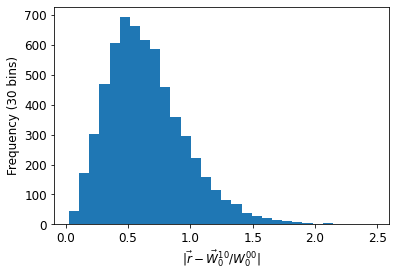

In [51]:
plt.hist(np.sqrt((df.cc_0_x-df.x)**2+(df.cc_0_y-df.y)**2+(df.cc_0_z-df.z)**2), bins = 30)
plt.xlabel(r'$|\vec{r}-\vec{W}_0^{10}/W_0^{00}|$')
plt.ylabel('Frequency (30 bins)')
plt.savefig('Voronoi_displacement_005000.pdf')

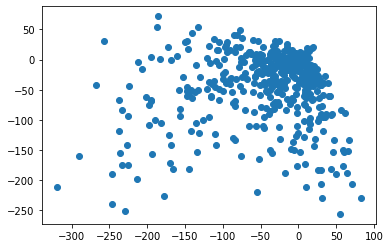

In [14]:
plt.scatter(df.x-df.w010_x/df.w000,df.y-df.w010_y/df.w000)

In [28]:
plt.scatter

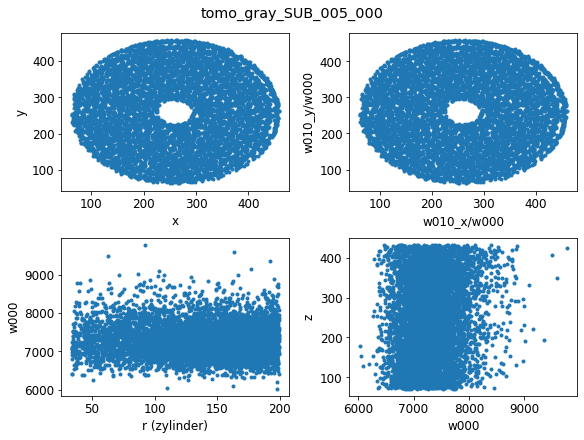

In [35]:
plt.rcParams.update({'font.size': 12})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (8,6), constrained_layout=True)
fig.suptitle('tomo_gray_SUB_005_000')

ax1.scatter(df.x,df.y, marker = '.')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.scatter(df.cc_0_x, df.cc_0_y, marker = '.')
ax2.set_xlabel('w010_x/w000')
ax2.set_ylabel('w010_y/w000')

ax3.scatter(df.r, df.w000, marker = '.')
ax3.set_xlabel('r (zylinder)')
ax3.set_ylabel('w000')

ax4.scatter(df.w000, df.z, marker = '.')
ax4.set_xlabel('w000')
ax4.set_ylabel('z')

plt.savefig('00500_analysis.pdf')
plt.show()

In [34]:
x_mean = df.x.mean()
y_mean = df.y.mean()
df['r'] = np.sqrt(np.square(df.x-x_mean)+np.square(df.y - y_mean))

r_th = 30
z_th = 50

mask1 = df.r < df.r.max() - r_th
mask2 = df.r > df.r.min() + r_th

mask3 = df.z < df.z.max() - z_th
mask4 = df.z > df.z.min() + z_th

mask = np.all([mask1,mask2,mask3,mask4], axis = 0)
df = df[mask]

In [15]:
df.r.max() - r_th

199.38827182010698

In [ ]:
plt.scatter(df.x, df.y)